In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the file
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

## Data Cleaning

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#remove unwanted columns
df = df[['v1','v2']]

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#changing column name for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#checking duplicate values
df.duplicated().sum()

403

In [11]:
#drop duplicate rows
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
#label column target
df['target'] = df.target.apply(lambda x: 0 if x=='ham' else 1)

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x262411282b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

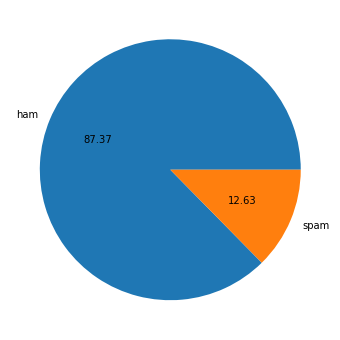

In [16]:
figure=plt.figure(figsize=(10,6))
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct='%0.2f')

C:\Users\nilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

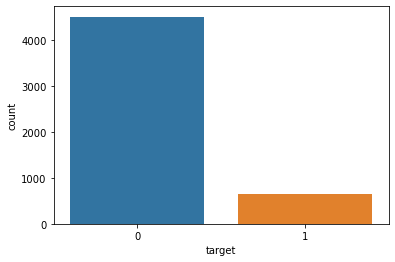

In [17]:
sns.countplot(df['target'])

In [18]:
#convert text into lower case
df['text'].apply(lambda x : x.lower())

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5169, dtype: object

In [19]:
#import necessary libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in punctuations:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ss.stem(i))
        
    return ' '.join(y)
    

In [23]:
#example
transform_text('My name is nileshkumar mandal. i live in Nashik city.')

'name nileshkumar mandal live nashik citi'

In [24]:
#transform the text column
df['text'] = df['text'].apply(transform_text)

In [25]:
df['text'][2]

'free entri 2 wkli comp win fa cup final tkts 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [26]:
#import wordcloud
from wordcloud import WordCloud

In [27]:
#wordcloud for target 'ham'
wc = WordCloud(width = 800, height = 800,background_color ='white')
wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))

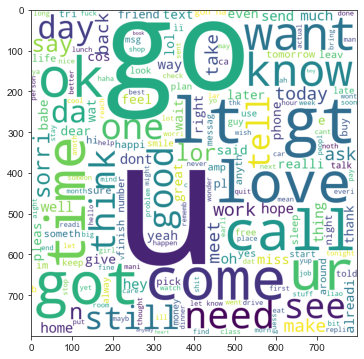

In [28]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
plt.imshow(wc)

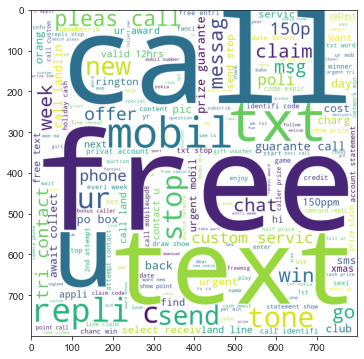

In [29]:
#wordcloud for 'spam'
wc = WordCloud(width = 800, height = 800,background_color ='white')
wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
interpolation = 'bilinear'
plt.imshow(wc)

In [30]:
ham_word = []
for i in df[df['target']==0]['text'].tolist():
    for word in i.split():
        ham_word.append(word)

In [31]:
len(ham_word)

35394

In [32]:
from collections import Counter

C:\Users\nilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


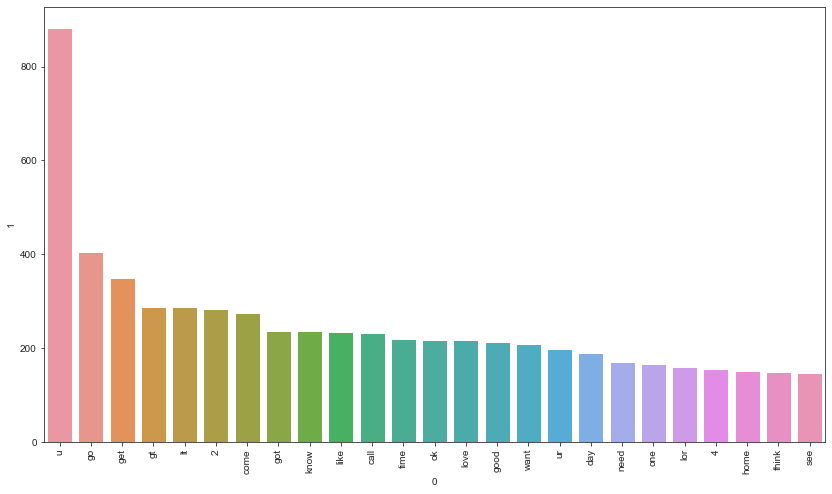

In [33]:
plt.figure(figsize=(14,8))
sns.barplot(pd.DataFrame(Counter(ham_word).most_common(25))[0],pd.DataFrame(Counter(ham_word).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
spam_word = []
for i in df[df['target']==1]['text'].tolist():
    for word in i.split():
        spam_word.append(word)

C:\Users\nilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


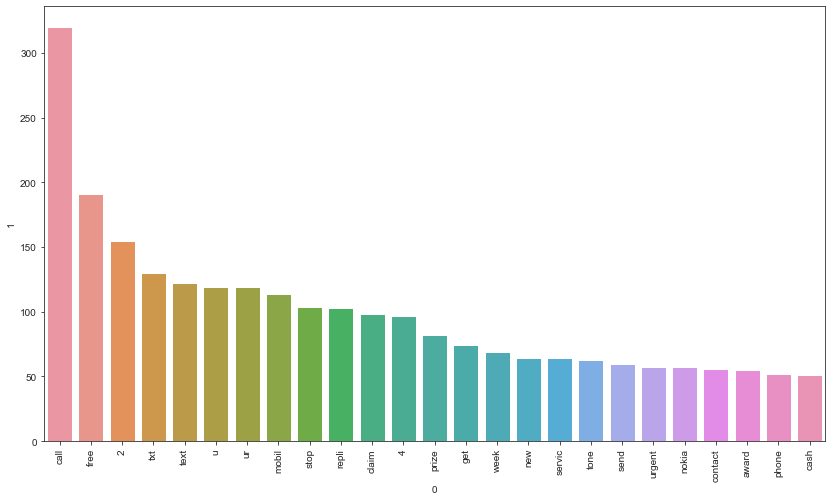

In [35]:
plt.figure(figsize=(14,8))
sns.barplot(pd.DataFrame(Counter(spam_word).most_common(25))[0],pd.DataFrame(Counter(spam_word).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [36]:
#convert text into numberical format
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [37]:
#toarray converts the sparse matrix into dense matrix
X = tfidf.fit_transform(df['text']).toarray()
X.shape

(5169, 6701)

In [52]:
y = df['target'].values
y.shape

(5169,)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1331
           1       0.53      0.83      0.65       220

    accuracy                           0.87      1551
   macro avg       0.75      0.85      0.78      1551
weighted avg       0.91      0.87      0.88      1551

------------------------------------------------------------
Accuracy :  0.8723404255319149
Precision :  0.5321637426900585
------------------------------------------------------------


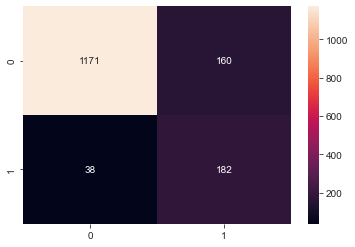

In [93]:
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,pred_gnb))
print('--'*30)
print('Accuracy : ',accuracy_score(y_test,pred_gnb))
print('Precision : ',precision_score(y_test,pred_gnb))
print('--'*30)
sns.heatmap(confusion_matrix(y_test,pred_gnb),annot = True,fmt='g')
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1331
           1       1.00      0.66      0.80       220

    accuracy                           0.95      1551
   macro avg       0.97      0.83      0.89      1551
weighted avg       0.95      0.95      0.95      1551

------------------------------------------------------------
Accuracy :  0.9522888459058672
Precision :  1.0
------------------------------------------------------------


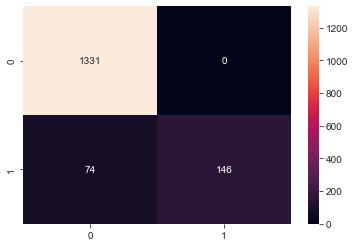

In [94]:
mnb.fit(X_train,y_train)
pred_mnb = mnb.predict(X_test)
print(classification_report(y_test,pred_mnb))
print('--'*30)
print('Accuracy : ',accuracy_score(y_test,pred_mnb))
print('Precision : ',precision_score(y_test,pred_mnb))
print('--'*30)
sns.heatmap(confusion_matrix(y_test,pred_mnb),annot = True,fmt='g')
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       0.97      0.78      0.86       220

    accuracy                           0.97      1551
   macro avg       0.97      0.89      0.92      1551
weighted avg       0.97      0.97      0.96      1551

------------------------------------------------------------
Accuracy :  0.965183752417795
Precision :  0.9715909090909091
------------------------------------------------------------


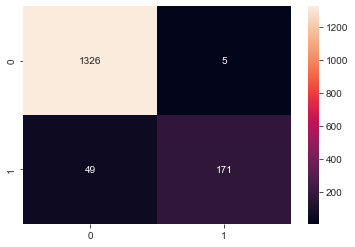

In [95]:
bnb.fit(X_train,y_train)
pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,pred_bnb))
print('--'*30)
print('Accuracy : ',accuracy_score(y_test,pred_bnb))
print('Precision : ',precision_score(y_test,pred_bnb))
print('--'*30)
sns.heatmap(confusion_matrix(y_test,pred_bnb),annot = True,fmt='g')
plt.show()

In [46]:
#import different classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=42)
xgb = XGBClassifier(n_estimators=50,random_state=42)

In [74]:
classifiers = {'SV': svc, 'KN': knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 
               'ABC': abc, 'BgC': bc, 'ETC': etc, 'GBC': gbc, 'XGB': xgb}

In [49]:
classifiers.items()

dict_items([('SV', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=42)), ('ABC', AdaBoostClassifier(random_state=42)), ('BgC', BaggingClassifier(n_estimators=50, random_state=42)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=42)), ('GBC', GradientBoostingClassifier(n_estimators=50, random_state=42)), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max

In [78]:
# function to train models
def train_classifier(classifier ,X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    
    return accuracy, precision

In [87]:
train_classifier(svc ,X_train, X_test, y_train, y_test)

(0.9722759509993553, 0.9682539682539683)

In [88]:
a_score = []
p_score = []

for name, classifier in classifiers.items():
    accuracy, precision = train_classifier(classifier,X_train, X_test, y_train, y_test)
    
    print('<-----------------For '+ name + ' ----------------->' )
    print('Accuracy : ',accuracy)
    print('Precision : ',precision)
    print('\n')

    a_score.append(accuracy)
    p_score.append(precision)

<-----------------For SV ----------------->
Accuracy :  0.9722759509993553
Precision :  0.9682539682539683




C:\Users\nilesh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<-----------------For KN ----------------->
Accuracy :  0.8865248226950354
Precision :  1.0


<-----------------For NB ----------------->
Accuracy :  0.9522888459058672
Precision :  1.0


<-----------------For DT ----------------->
Accuracy :  0.9316569954867827
Precision :  0.8097826086956522


<-----------------For LR ----------------->
Accuracy :  0.9393939393939394
Precision :  0.8795180722891566


<-----------------For RF ----------------->
Accuracy :  0.9690522243713733
Precision :  1.0


<-----------------For ABC ----------------->
Accuracy :  0.9555125725338491
Precision :  0.9081081081081082


<-----------------For BgC ----------------->
Accuracy :  0.9626047711154094
Precision :  0.8857142857142857


<-----------------For ETC ----------------->
Accuracy :  0.9690522243713733
Precision :  0.9831460674157303


<-----------------For GBC ----------------->
Accuracy :  0.9522888459058672
Precision :  0.95625


<-----------------For XGB ----------------->
Accuracy :  0.972920696324

In [89]:
table = pd.DataFrame({'Algorithm' : classifiers.keys(),'Accuracy':a_score, 'Precision': p_score})
table

,Algorithm,Accuracy,Precision
0,SV,0.972276,0.968254
1,KN,0.886525,1.000000
2,NB,0.952289,1.000000
3,DT,0.931657,0.809783
4,LR,0.939394,0.879518
5,RF,0.969052,1.000000
6,ABC,0.955513,0.908108
7,BgC,0.962605,0.885714
8,ETC,0.969052,0.983146
9,GBC,0.952289,0.956250


In [90]:
table.sort_values(by = ['Precision'],ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.886525,1.000000
2,NB,0.952289,1.000000
5,RF,0.969052,1.000000
8,ETC,0.969052,0.983146
0,SV,0.972276,0.968254
9,GBC,0.952289,0.956250
10,XGB,0.972921,0.945000
6,ABC,0.955513,0.908108
7,BgC,0.962605,0.885714
4,LR,0.939394,0.879518


In [96]:
from sklearn.ensemble import VotingClassifier

In [125]:
voting = VotingClassifier(estimators=[('mnb', mnb), ('bnb', bnb),('rf',rfc),('etc',etc),('svc',svc)], voting='soft')

In [126]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42)),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

Accuracy :  0.9748549323017408
Precision :  1.0


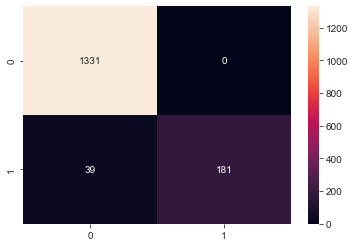

In [128]:
y_pred = voting.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='g')
plt.show()

## Voting classifier is best algorithm to classify ham/spam sms.
